# Assignment 5 - 70 points possible

## Apple, Bird, Cookie:
## Data from Google's Quick, Draw!  Game

We will perform 2 tasks in this homework.  The first is to build a classifier that can tell whether a drawing is of an apple, a bird, or a cookie.  The data is taken from a game you can play online, developed by Google, called Quick, Draw!  The drawings are all Pictionary-style quick sketches of things.  Google has already done the work of turning the drawings into grayscale 28 x 28 images that are good for machine learning.  Since the images don't have that many pixels, the drawings are simplified, and there is a lot of data, this is an example of a relatively easy task for machine learning generally and neural networks in particular.  (There are many similar datasets here:  https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false)

Before you do anything else in this assignment, it's *strongly recommended* that you do two things with your Google Colab setup.  First, go to the upper right and select "Connect to a hosted runtime."  Second, go to the menu at the top and select Runtime->Change runtime type->Pick GPU.  Selecting "GPU" will dramatically speed up the training times for the neural networks in this assignment.  But, picking GPU also resets the runtime, which is why you should do this before anything else.

Download the two zip files associated with this homework at https://drive.google.com/file/d/14ZkNqKC34mUW5yUa6WjYWf1R-CempaoB/view?usp=sharing and https://drive.google.com/file/d/14UmGyFC_WSywNcm2yrCfe0x04IuA42O8/view?usp=sharing and place them in your own Google Drive.  Then run the code boxes below (possibly modifying the path) to mount the drive and unzip the files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# You may need to change "NNAssign" to your own directory name
!unzip gdrive/MyDrive/'Junior Year'/'DS 340'/'HW 5'/apple_bird_cookie.zip

Archive:  gdrive/MyDrive/Junior Year/DS 340/HW 5/apple_bird_cookie.zip
  inflating: full_numpy_bitmap_apple.npy  
  inflating: __MACOSX/._full_numpy_bitmap_apple.npy  
  inflating: full_numpy_bitmap_bird.npy  
  inflating: __MACOSX/._full_numpy_bitmap_bird.npy  
  inflating: full_numpy_bitmap_cookie.npy  
  inflating: __MACOSX/._full_numpy_bitmap_cookie.npy  


In [ ]:
import numpy as np

apples = np.load('full_numpy_bitmap_apple.npy')
birds = np.load('full_numpy_bitmap_bird.npy')
cookies = np.load('full_numpy_bitmap_cookie.npy')

(1, 2pts) Call np.concatenate to join the three datasets together into a single array called "all_kinds".  Notice that the three datasets should be passed to np.concatenate as a tuple.


In [ ]:
# TODO concatenate the data
all_kinds = np.concatenate((apples, birds, cookies))

(2, 3 pts) Now we need a list of labels that is as long as all_kinds.  Create a list named "labels" that is as long as all_kinds, where each element identifies which kind of drawing can be found at that place in all_kinds.  Label apples as 0, birds as 1, and cookies as 2.  (You may find it useful to call len() on the apples, birds, and cookies arrays.)

In [ ]:
# TODO make labels
labels = [0] * len(apples) + [1] * len(birds) + [2] * len(cookies)

Now we'll call train_test_split to separate the data into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_kinds, labels)

(3, 2pts) This data ranges from 0 to 255, but neural networks tend to work best when the data is between 0 and 1.
Scale the train and test data by dividing it by 255.

In [ ]:
# TODO scale the data
print(x_train.shape)
x_train = x_train/255
x_test = x_test/255

(307235, 784)


(4, 5pts) If we examine the shape of x, it isn't quite what we want yet - it is an array of arrays that are of size length-of-data x 784.  784 is 28x28, and we want our convolutional neural networks to perceive the data as a 28x28 square instead of one long array of 784 elements.  Call x_train.reshape() and x_test.reshape() so that their dimensions are length-of-data x 28 x 28.  (Note that reshape expects a tuple that is the size as its argument.  You can pass -1 as one of the dimensions if you don't want to figure out how long the array is.)

In [ ]:
x_train[0].shape

(784,)

In [ ]:
# TODO reshape x_train
x_train = x_train.reshape((-1, 28,28))

In [ ]:
# TODO reshape x_test
x_test = x_test.reshape((-1, 28, 28))

If your reshape worked correctly, the following code should show a apple, bird, or cookie sketch.  If it didn't work, it will look like random noise.  If you're not sure, you can always try more images.

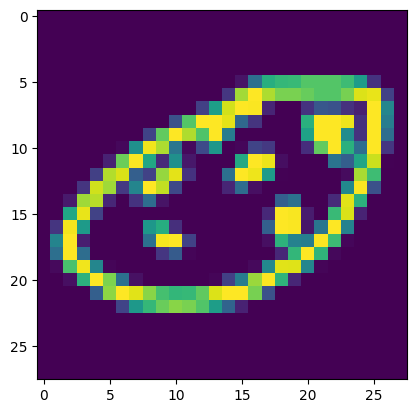

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # Should be a recognizable image if we reshaped correctly

As the last step before creating the neural network, we will turn the labels into one-hot encodings, like [0,0,1] instead of 2.  There's a handy keras function that does this, and we're just going to call it for you.

In [ ]:
from tensorflow import keras
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(5, 9pts) Rather than create a network completely from scratch, it makes sense to start with a network that you know does something similar.  One of the keras tutorials shows how to do digit recognition with a relatively small deep neural network.  The dataset, the MNIST digit dataset, is very similar to ours because it consists of 28 x 28 black and white line drawings.  Consult the "Build a Model" and "Train the model" sections of https://keras.io/examples/vision/mnist_convnet/ and get that neural network running on our apple, bird, and cookie data.  (Be sure to leave a comment indicating that you borrowed the structure from there.)


In [ ]:
from tensorflow.keras import layers
input_shape = (28,28,1)
batch_size = 128
epochs = 15

In [ ]:
# TODO borrow the MNIST model with attribution
# model architecture from fchollet
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
# TODO compile and fit the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
2161/2161 [==============================] - 24s 6ms/step - loss: 0.1320 - accuracy: 0.9589 - val_loss: 0.0872 - val_accuracy: 0.9719
Epoch 2/15
2161/2161 [==============================] - 11s 5ms/step - loss: 0.0852 - accuracy: 0.9728 - val_loss: 0.0703 - val_accuracy: 0.9773
Epoch 3/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0738 - accuracy: 0.9764 - val_loss: 0.0641 - val_accuracy: 0.9789
Epoch 4/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0687 - accuracy: 0.9777 - val_loss: 0.0601 - val_accuracy: 0.9797
Epoch 5/15
2161/2161 [==============================] - 13s 6ms/step - loss: 0.0652 - accuracy: 0.9789 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 6/15
2161/2161 [==============================] - 12s 5ms/step - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.0569 - val_accuracy: 0.9813
Epoch 7/15
2161/2161 [==============================] - 13s 6ms/step - loss: 0.0600 - accuracy: 0.9801 - val_loss: 0.0557 - val_ac

(6, 2pts) Evaluate the model on the test set with the code below.  You should have a test accuracy well above 90%.

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.047915734350681305
Test accuracy: 0.9842401146888733


## Cats and Dogs

It was relatively easy to get good performance on that task, because the size of each input is small and the features needed for success weren't too complicated.  We'll now try a classification task with real images.  This is a moderately well-known "cats and dogs" dataset.  Unzip the dogs-vs-cats dataset in the current directory.  You can examine the files to see pictures of cats and dogs with varying dimensions and varying poses.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!unzip gdrive/MyDrive/"Junior Year"/"DS 340"/"HW 5"/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats/train/cats/cat.2260.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.2260.jpg  
  inflating: dogs-vs-cats/train/cats/cat.594.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.594.jpg  
  inflating: dogs-vs-cats/train/cats/cat.5269.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.5269.jpg  
  inflating: dogs-vs-cats/train/cats/cat.2506.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.2506.jpg  
  inflating: dogs-vs-cats/train/cats/cat.11051.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.11051.jpg  
  inflating: dogs-vs-cats/train/cats/cat.3618.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.3618.jpg  
  inflating: dogs-vs-cats/train/cats/cat.4177.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.4177.jpg  
  inflating: dogs-vs-cats/train/cats/cat.8995.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.8995.jpg  
  inflating: dogs-vs-cats/tra

In [7]:
!ls

dogs-vs-cats  gdrive  __MACOSX	sample_data


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
import tensorflow as tf
image_size = (180, 180)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
# Code from https://keras.io/examples/vision/image_classification_from_scratch/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


(7, 9pts) We'll suppose that the closest starting point network we have on hand for this is the MNIST network again.  Adapt it to this dataset with the following changes:

* The input shape is 180 x 180 x 3.
* Put the rescaling of dividing values by 255 in the network itself with a layers.Rescaling() layer after the Input layer.  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
* The final "softmax" activation function is only appropriate for multiclass classification.  Change this to a more appropriate activation function for binary classification.
* Name the model model2 to work with the training code below.

In [6]:
# TODO create model2
# model architecture from fchollet

input_shape2 = (180, 180, 3)

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape2),
        layers.Rescaling(scale=1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 118336)            0

You can train the network using the following code.

In [ ]:
epochs = 15

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(train_ds, epochs=epochs, validation_data=val_ds) # Validation data instead of fraction

Epoch 1/15
625/625 [==============================] - 47s 70ms/step - loss: 0.6269 - accuracy: 0.6472 - val_loss: 0.5511 - val_accuracy: 0.7282
Epoch 2/15
625/625 [==============================] - 38s 61ms/step - loss: 0.5203 - accuracy: 0.7459 - val_loss: 0.4979 - val_accuracy: 0.7586
Epoch 3/15
625/625 [==============================] - 35s 55ms/step - loss: 0.4476 - accuracy: 0.7932 - val_loss: 0.5094 - val_accuracy: 0.7610
Epoch 4/15
625/625 [==============================] - 37s 58ms/step - loss: 0.3924 - accuracy: 0.8227 - val_loss: 0.4799 - val_accuracy: 0.7784
Epoch 5/15
625/625 [==============================] - 37s 59ms/step - loss: 0.3447 - accuracy: 0.8493 - val_loss: 0.4924 - val_accuracy: 0.7880
Epoch 6/15
625/625 [==============================] - 37s 58ms/step - loss: 0.3050 - accuracy: 0.8666 - val_loss: 0.5178 - val_accuracy: 0.7898
Epoch 7/15
625/625 [==============================] - 35s 55ms/step - loss: 0.2687 - accuracy: 0.8846 - val_loss: 0.5424 - val_accuracy:

(8, 6pts) The validation loss went down and then up, indicating overfitting, so we possibly could proceed to regularization steps at this point; nevertheless, for photos, we probably want to try some deeper architectures than for the hand drawings.  Probably, the features extracted for the MNIST and apple/bird/cookie datasets are simpler than what's necessary for photos.  This implies needing more layers.  One strategy used by some well-known networks is to add blocks each consisting of a Conv2D layer followed by MaxPooling2D layer, where each Conv2D layer has twice as many filters as the last one (so 32, 64, 128 ...).  You can see our current architecture already follows this pattern.  Try training networks with one, two, and three more of these blocks between the last MaxPooling2D layer and the Flatten() call.

In [ ]:
# TODO define model3 with one more block of Conv2D and pooling

model3 = keras.Sequential([
    keras.Input(shape=input_shape2),
    layers.Rescaling(scale=1./255),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 41, 41, 128)     

In [ ]:
epochs = 15

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 45s 69ms/step - loss: 0.5871 - accuracy: 0.6757 - val_loss: 0.5049 - val_accuracy: 0.7576
Epoch 2/15
625/625 [==============================] - 42s 66ms/step - loss: 0.4651 - accuracy: 0.7811 - val_loss: 0.4364 - val_accuracy: 0.8012
Epoch 3/15
625/625 [==============================] - 39s 61ms/step - loss: 0.4081 - accuracy: 0.8139 - val_loss: 0.3969 - val_accuracy: 0.8266
Epoch 4/15
625/625 [==============================] - 36s 56ms/step - loss: 0.3613 - accuracy: 0.8396 - val_loss: 0.3836 - val_accuracy: 0.8338
Epoch 5/15
625/625 [==============================] - 38s 60ms/step - loss: 0.3173 - accuracy: 0.8625 - val_loss: 0.3911 - val_accuracy: 0.8322
Epoch 6/15
625/625 [==============================] - 35s 56ms/step - loss: 0.2888 - accuracy: 0.8788 - val_loss: 0.3798 - val_accuracy: 0.8376
Epoch 7/15
625/625 [==============================] - 39s 62ms/step - loss: 0.2594 - accuracy: 0.8895 - val_loss: 0.3724 - val_accuracy:

In [9]:
# TODO define model4 with two more blocks of Conv2D and pooling
model4 = keras.Sequential([
    keras.Input(shape=input_shape2),
    layers.Rescaling(scale=1./255),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 41, 41, 128)      

In [10]:
epochs = 15

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 43s 65ms/step - loss: 0.6648 - accuracy: 0.5889 - val_loss: 0.5687 - val_accuracy: 0.7162
Epoch 2/15
625/625 [==============================] - 36s 58ms/step - loss: 0.5398 - accuracy: 0.7276 - val_loss: 0.4831 - val_accuracy: 0.7684
Epoch 3/15
625/625 [==============================] - 38s 60ms/step - loss: 0.4553 - accuracy: 0.7865 - val_loss: 0.4151 - val_accuracy: 0.8086
Epoch 4/15
625/625 [==============================] - 38s 61ms/step - loss: 0.3883 - accuracy: 0.8253 - val_loss: 0.3695 - val_accuracy: 0.8388
Epoch 5/15
625/625 [==============================] - 36s 58ms/step - loss: 0.3386 - accuracy: 0.8533 - val_loss: 0.3596 - val_accuracy: 0.8472
Epoch 6/15
625/625 [==============================] - 37s 59ms/step - loss: 0.2942 - accuracy: 0.8735 - val_loss: 0.3184 - val_accuracy: 0.8638
Epoch 7/15
625/625 [==============================] - 35s 55ms/step - loss: 0.2592 - accuracy: 0.8906 - val_loss: 0.3100 - val_accuracy:

In [11]:
# TODO model5 with three more blocks of Conv2D and pooling

model5 = keras.Sequential([
    keras.Input(shape=input_shape2),
    layers.Rescaling(scale=1./255),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

model5.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 41, 41, 128)      

In [12]:
epochs = 15

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model5.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 43s 65ms/step - loss: 0.6811 - accuracy: 0.5480 - val_loss: 0.6413 - val_accuracy: 0.6058
Epoch 2/15
625/625 [==============================] - 35s 56ms/step - loss: 0.5850 - accuracy: 0.6811 - val_loss: 0.4866 - val_accuracy: 0.7604
Epoch 3/15
625/625 [==============================] - 37s 59ms/step - loss: 0.4619 - accuracy: 0.7806 - val_loss: 0.3909 - val_accuracy: 0.8202
Epoch 4/15
625/625 [==============================] - 36s 57ms/step - loss: 0.3631 - accuracy: 0.8402 - val_loss: 0.3100 - val_accuracy: 0.8596
Epoch 5/15
625/625 [==============================] - 37s 59ms/step - loss: 0.2875 - accuracy: 0.8769 - val_loss: 0.2897 - val_accuracy: 0.8744
Epoch 6/15
625/625 [==============================] - 35s 56ms/step - loss: 0.2344 - accuracy: 0.9015 - val_loss: 0.2633 - val_accuracy: 0.8866
Epoch 7/15
625/625 [==============================] - 37s 59ms/step - loss: 0.1945 - accuracy: 0.9190 - val_loss: 0.2589 - val_accuracy:

(9, 6pts) Architecture search could continue all day, but let's take a different approach to improving the network further.  When the accuracy on the training data is higher than the validation accuracy, this is evidence of overfitting.  Two approaches to handling overfitting are:

* More dropout.  We have one big layer of dropout, but we could have one or more additional layers of Dropout(0.2).
* Data augmentation.  If the dataset is randomly rotated and flipped, this encourages features that are robust against these transformations, and it makes it harder to overfit the data.  We can work this into the pipeline itself with layers.RandomFlip("horizontal") and layers.RandomRotation(0.1).

Train a new network with these two ideas worked into your best architecture so far.  (Your best architecture is the one that you achieved the highest validation accuracy on.)  The dropout locations are up to you.  Use 20 epochs instead of 15, since these methods slow down the learning somewhat.

In [15]:
# TODO model6 with data augmentation and some extra dropout

model6 = keras.Sequential([
    keras.Input(shape=input_shape2),
    layers.Rescaling(scale=1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 180, 180, 3)       0         
 ation)                                                          
                                                                 
 conv2d_26 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 87, 87, 64)       

In [16]:
epochs = 20

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
625/625 [==============================] - 46s 71ms/step - loss: 0.6810 - accuracy: 0.5599 - val_loss: 0.6502 - val_accuracy: 0.6412
Epoch 2/20
625/625 [==============================] - 43s 68ms/step - loss: 0.6146 - accuracy: 0.6636 - val_loss: 0.5630 - val_accuracy: 0.7160
Epoch 3/20
625/625 [==============================] - 43s 69ms/step - loss: 0.5453 - accuracy: 0.7264 - val_loss: 0.4969 - val_accuracy: 0.7638
Epoch 4/20
625/625 [==============================] - 44s 69ms/step - loss: 0.4815 - accuracy: 0.7710 - val_loss: 0.4104 - val_accuracy: 0.8118
Epoch 5/20
625/625 [==============================] - 44s 69ms/step - loss: 0.4391 - accuracy: 0.7957 - val_loss: 0.3652 - val_accuracy: 0.8330
Epoch 6/20
625/625 [==============================] - 44s 70ms/step - loss: 0.4003 - accuracy: 0.8210 - val_loss: 0.4222 - val_accuracy: 0.7900
Epoch 7/20
625/625 [==============================] - 44s 69ms/step - loss: 0.3570 - accuracy: 0.8413 - val_loss: 0.3143 - val_accuracy:

(10, 7pts) Rather than building a model from nearly scratch, a different approach ("transfer learning") is to take an existing model that did something similar, including its trained weights, and retrain only a few layers at the very end of the model, keeping the rest of the model "frozen."  This allows complex features learned from a lot of data to be used on smaller problems with less data, and it saves on training time as well.

You can base your code on the transfer learning example provided in lecture.  (Note that since this is a binary classification problem instead of multiclass, you will need to change the final layer's activation function and the loss function.)  You should keep the "adam" optimizer we've been using all along.  You should only need to train to 7 epochs.

In [1]:
from keras.applications.vgg16 import VGG16

In [14]:
# TODO:  define model7 using transfer learning

# Architecture based on https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
model = VGG16(include_top=False, input_shape=(180,180,3)) # we'll replace the "top" with our own layers
for layer in model.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(model.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(1, activation='sigmoid')(drop2)
# define new model
model7 = keras.models.Model(inputs=model.inputs, outputs=output)
model7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model7.fit(train_ds, epochs=7,validation_data=val_ds)

Epoch 1/7
625/625 [==============================] - 87s 118ms/step - loss: 0.6535 - accuracy: 0.9193 - val_loss: 0.1082 - val_accuracy: 0.9608
Epoch 2/7
625/625 [==============================] - 75s 119ms/step - loss: 0.1538 - accuracy: 0.9540 - val_loss: 0.0987 - val_accuracy: 0.9646
Epoch 3/7
625/625 [==============================] - 74s 118ms/step - loss: 0.1311 - accuracy: 0.9576 - val_loss: 0.1000 - val_accuracy: 0.9628
Epoch 4/7
625/625 [==============================] - 74s 118ms/step - loss: 0.1129 - accuracy: 0.9605 - val_loss: 0.1061 - val_accuracy: 0.9668
Epoch 5/7
625/625 [==============================] - 74s 118ms/step - loss: 0.1069 - accuracy: 0.9639 - val_loss: 0.1066 - val_accuracy: 0.9628
Epoch 6/7
625/625 [==============================] - 74s 117ms/step - loss: 0.0949 - accuracy: 0.9661 - val_loss: 0.1030 - val_accuracy: 0.9670
Epoch 7/7
625/625 [==============================] - 74s 117ms/step - loss: 0.0909 - accuracy: 0.9661 - val_loss: 0.1038 - val_accuracy:

(11, 19pts) Last, answer these questions.

(a, 6 pts) Suppose we have a small perceptron with 3 inputs, no hidden units, and one output unit.  The 2 inputs represent car attributes:  cost (normalized to [0,1]), and mileage on the car (normalized to [0,1]).  Assume the input neurons have no activation functions.  Can this tiny network learn the rule, “fire if cost < 0.5, or mileage < 0.5”?  If so, specify the weights in the network.  If not, describe the smallest network you can that can effectively represent this rule (assuming the inputs still don’t have activation functions and the output neuron’s activation function is a step function) - give specific weights that would work.

**TODO** The tiny network cannot learn the rule "fire if cost < 0.5, or mileage < 0.5" if the input neurons have no activation functions.

The smallest network that can effectively represent this rule would be a two layer neural network with 2 neurons in the first layer, and 1 neuron in the second layer. The 2 neurons in the first layer would be able to learn the rule "fire if cost < 0.5" and "fire if mileage < 0.5" (one rule for each neuron). The weights that could be specified could be $w_0 = 0.5$ and $w_1 = -1$ where the neuron decides to fire if $w_0 + \sum w_i x_i > 0$. If the first input $x_1$ (representing cost) is less than 0.5, then the inequality would be true, leading to the neuron to fire. These weights would also apply to the second neuron in the first layer to fire when the mileage is less than 0.5.

The single neuron in the second layer would utilize the OR boolean operation, taking in the outputs from the 2 neurons in the first layer. The weights for the neuron in the second layer would be $w_0 = -0.5$, and $w_1, w_2 = 0.5$ where the neuron uses the inequality $w_0 + \sum w_i x_i \geq 0$ to determine if it fires.

This tiny network would be able to learn the rule "fire if cost < 0.5, or mileage < 0.5."

(b, 3pts) Give values for a 3x3 convolutional filter that would plausibly detect small X’s in the image - the meeting of two diagonal lines. Assume the lines are both white or both black (your choice).

**TODO** A convolutional filter that would plausibly detect small X's in the image - the meeting of two diagonal lines would be:

[[1, -1, 1],

 [-1, 1, -1],

 [1, -1, 1]]

 This convolutional filter would detect small X's in the image because this filter would be the most active when the diagonal pixels in the filter are the similar while the non-diagonal pixels are very different from the diagonal pixels. This convolutional filter will highlight the intersection of these diagonal lines, and detect the small X's in the image.

(c, 3pts) Transfer learning is effective, and it's more effective the more similar the original task was to the present one.  Skim the Wikipedia page on ImageNet, the dataset used to train VGG-16 (and maybe follow up by searching this subset of ImageNet's classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Is there reason to think transfer learning with VGG-16 might be particularly effective for classifying cats and dogs?

**TODO**
One reason why transfer learning with VGG-16 might be particularly effective for classifying cats and dogs is because the ImageNet dataset contains 120 categories of dog breeds to showcase fine-grained classification. Since VGG-16 was trained on the ImageNet dataset, VGG-16 would be able to precicely identify dogs, and is able to classify 120 different dog breeds. Due to the this training dataset, transfer learning with VGG-16 would be particularly effective for classifying cats and dogs.

(d, 3pts) Suppose we introduce a new activation function in all the neurons in our neural network, g(x) = sin(x). We then notice vanishing gradient problems. What are some values of x that would be particularly problematic for this function in backpropagation?

**TODO** Some values of x that would be particularly problematic for this function in backpropagation would be $\frac{\pi}{2}, \frac{3\pi}{2},...$. This is because the gradient at these x values would be 0, causing the vanishing gradient problem to quickly occur during backpropagation.

(e, 4pts) A museum wants to train a neural network to identify plants, using museum plant specimens. In some cases they only have one example of a species, though, making a train/test split difficult.  They decide to use data augmentation in these cases, putting most of the augmented images in the training set with the original image, but also putting a few augmented images in the test set in each case.  Will this classifier have good performance "in the wild" on these species?  Why or why not?  Would we get better performance if we just trained on the unaugmented, single image?

**TODO** I believe that the classifier trained on data with additional data augmentation will have good performance "in the wild" on these species. Data augmentation would enable the model to learn more generic features about the species of plant, learning to correctly classify the plant even when the image is rotated and flipped, better simulating the differing camera angles and images gained from the real world.

The model would have much worse performance if it was just trained on the unaugmented, single image. If the model was only trained on the single image of the species of plant, the model would easily overfit to the singular image, and wouldn't be able to easily recognize other photos of the same species.

**When you're done, use "File->Download .ipynb" and upload your .ipynb file to Blackboard, along with a PDF version (File->Print->Save as PDF) of your assignment.**